In [12]:
import pandas as pd
data = pd.read_csv('sgd_2022.csv')
print(data.head())


           Datetime Opponent Club    League Type Match Type Result
0  14-01-2022 18:30       Hamburg  2. Bundesliga       Home   Draw
1  23-01-2022 13:30      Hannover  2. Bundesliga       Away   Draw
2  06-02-2022 14:30       Rostock  2. Bundesliga       Home   Lose
3  12-02-2022 13:30     Paderborn  2. Bundesliga       Away   Draw
4  18-02-2022 19:30    Heidenheim  2. Bundesliga       Home   Draw


In [13]:
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')

data['Date'] = data['Datetime'].dt.date
data['Time'] = data['Datetime'].dt.time


In [14]:
print(data.head())

             Datetime Opponent Club    League Type Match Type Result  \
0 2022-01-14 18:30:00       Hamburg  2. Bundesliga       Home   Draw   
1 2022-01-23 13:30:00      Hannover  2. Bundesliga       Away   Draw   
2 2022-02-06 14:30:00       Rostock  2. Bundesliga       Home   Lose   
3 2022-02-12 13:30:00     Paderborn  2. Bundesliga       Away   Draw   
4 2022-02-18 19:30:00    Heidenheim  2. Bundesliga       Home   Draw   

         Date      Time  
0  2022-01-14  18:30:00  
1  2022-01-23  13:30:00  
2  2022-02-06  14:30:00  
3  2022-02-12  13:30:00  
4  2022-02-18  19:30:00  


['Draw' 'Win' 'Lose']


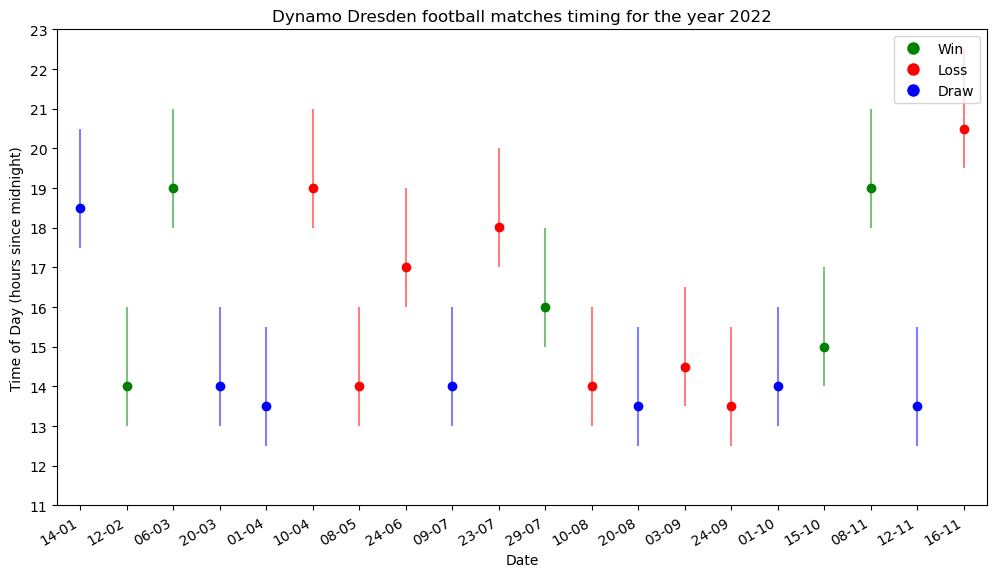

Total number of matches: 20


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('sgd_2022.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')


data['Date'] = data['Datetime'].dt.date
data['Time'] = data['Datetime'].dt.time


data['Hours Since Midnight'] = data['Datetime'].dt.hour + data['Datetime'].dt.minute / 60


data = data.sample(n=20)  


print(data['Result'].unique())


result_colors = {'Win': 'green', 'Loss': 'red', 'Draw': 'blue', 'Lose': 'red'}

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 7))

# Create a parameter variable for evenly spaced ticks
param = np.arange(len(data))


for i, (index, row) in enumerate(data.iterrows()):
    ax.scatter(param[i], row['Hours Since Midnight'], color=result_colors[row['Result']])
    ax.vlines(param[i], row['Hours Since Midnight'] - 1, row['Hours Since Midnight'] + 2, color=result_colors[row['Result']], alpha=0.5)


ax.set_xlabel('Date')
ax.set_ylabel('Time of Day (hours since midnight)')
ax.set_title('Dynamo Dresden football matches timing for the year 2022')


match_dates = sorted(data['Datetime'].unique())

ax.set_xticks(param)
ax.set_xticklabels([date.strftime('%d-%m') for date in match_dates])

ax.set_xlim([-0.5, len(data) - 0.5])

ax.set_yticks(range(11, 24))

fig.autofmt_xdate()


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Win', markersize=10, markerfacecolor='green'),
    plt.Line2D([0], [0], marker='o', color='w', label='Loss', markersize=10, markerfacecolor='red'),
    plt.Line2D([0], [0], marker='o', color='w', label='Draw', markersize=10, markerfacecolor='blue')
]

ax.legend(handles=legend_elements, loc='best')

plt.show()

total_matches = len(data)
print("Total number of matches:", total_matches)


In [23]:
## Map visualization

In [27]:
import folium
import pandas as pd
import re


file_path = 'pcs_meta.csv'  
data = pd.read_csv(file_path)


def extract_coordinates(geom):
    if pd.notna(geom):
        match = re.search(r'POINT \(([^ ]+) ([^ ]+)\)', geom)
        if match:
            longitude, latitude = match.groups()
            return float(latitude), float(longitude)
    return None, None

data[['latitude', 'longitude']] = data['geom'].apply(lambda x: pd.Series(extract_coordinates(x)))


data = data.dropna(subset=['latitude', 'longitude'])


map_center = [data['latitude'].mean(), data['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)


for _, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Location: {row['location']}<br>Lane: {row['lane']}<br>Sensor ID: {row['pcs_id']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)


mymap.save('sensor_locations_map.html')

print("Map has been saved as 'sensor_locations_map.html'.")


Map has been saved as 'sensor_locations_map.html'.


## Map visualization of sensors

In [28]:
import folium
import pandas as pd
import re
from IPython.display import display


file_path = 'pcs_meta.csv'  # Adjust this path if necessary
data = pd.read_csv(file_path)


def extract_coordinates(geom):
    if pd.notna(geom):
        match = re.search(r'POINT \(([^ ]+) ([^ ]+)\)', geom)
        if match:
            longitude, latitude = match.groups()
            return float(latitude), float(longitude)
    return None, None


data[['latitude', 'longitude']] = data['geom'].apply(lambda x: pd.Series(extract_coordinates(x)))


data = data.dropna(subset=['latitude', 'longitude'])


map_center = [data['latitude'].mean(), data['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)


for _, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Location: {row['location']}<br>Lane: {row['lane']}<br>Sensor ID: {row['pcs_id']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

display(mymap)


## Looking into sample VAMOS data

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'sample_vamos_data_2022_23.csv'
data = pd.read_csv(file_path)

# Inspect the first few rows and info of the dataset
print("Dataset preview:")
print(data.head())
print("\nDataset info:")
print(data.info())

# Ignore rows with missing data
data_cleaned = data.dropna()

# Convert 'time' column to datetime and handle errors
data_cleaned.loc[:, 'time'] = pd.to_datetime(data_cleaned['time'], format='%d-%m-%Y %H:%M', errors='coerce')

# Check the conversion result
print("\nConversion to datetime:")
print(data_cleaned['time'].head())

# Drop rows where 'time' could not be parsed
data_cleaned = data_cleaned.dropna(subset=['time'])

# Ensure data is sorted by time
data_cleaned = data_cleaned.sort_values('time')

# Check if the DataFrame is empty after cleaning
if data_cleaned.empty:
    print("No valid data available after cleaning.")
else:
    # Aggregate data to visualize daily patterns
    data_cleaned['hour'] = data_cleaned['time'].dt.hour
    # Sum numeric columns, excluding 'time' and 's_idx'
    hourly_data = data_cleaned.groupby('hour')[['trafficVolumeHeavy', 'trafficVolumeLight']].sum().reset_index()

    # Check aggregated data
    print("\nAggregated hourly data:")
    print(hourly_data.head())

    # Time series plot for traffic volumes
    plt.figure(figsize=(12, 6))
    plt.plot(data_cleaned['time'], data_cleaned['trafficVolumeHeavy'], label='Heavy Traffic Volume', color='red')
    plt.plot(data_cleaned['time'], data_cleaned['trafficVolumeLight'], label='Light Traffic Volume', color='blue')
    plt.title('Traffic Volume Over Time')
    plt.xlabel('Time')
    plt.ylabel('Traffic Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save or show plot
    plt.savefig('traffic_volume_time_series.png')
    plt.show()

    # Distribution plot for hourly traffic volumes
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=hourly_data, x='hour', y='trafficVolumeHeavy', label='Heavy Traffic Volume', color='red')
    sns.lineplot(data=hourly_data, x='hour', y='trafficVolumeLight', label='Light Traffic Volume', color='blue')
    plt.title('Hourly Traffic Volume Distribution')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Traffic Volume')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save or show plot
    plt.savefig('hourly_traffic_volume_distribution.png')
    plt.show()


Dataset preview:
                  time  s_idx  speed  netTimeGap  occupiedTime  vehicleLength  \
0  2022-01-01 00:00:00    493   50.0     76100.0         289.0            4.0   
1  2022-01-01 00:01:00    493   47.0     51510.0         376.0            4.9   
2  2022-01-01 00:02:00    493   50.0         0.0           0.0            0.0   
3  2022-01-01 00:03:00    493   50.0         0.0           0.0            0.0   
4  2022-01-01 00:04:00    493   50.0         0.0           0.0            0.0   

   trafficVolumeHeavy  trafficVolumeLight  
0                 0.0                 1.0  
1                 0.0                 1.0  
2                 0.0                 0.0  
3                 0.0                 0.0  
4                 0.0                 0.0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18083520 entries, 0 to 18083519
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   time                object 
 1  

In [40]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import pickle

# Load the CSV file
data = pd.read_csv('pcs_meta.csv')

# Extract latitude and longitude from the 'geom' column
data[['longitude', 'latitude']] = data['geom'].str.extract(r'POINT \((.*) (.*)\)')
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')

# Drop rows with NaN coordinates
data.dropna(subset=['latitude', 'longitude'], inplace=True)

# Define a function to calculate distance between two points
def calculate_distance(row1, row2):
    point1 = (row1['latitude'], row1['longitude'])
    point2 = (row2['latitude'], row2['longitude'])
    return geodesic(point1, point2).meters

# Create an empty adjacency matrix
num_sensors = len(data)
adjacency_matrix_connectivity = np.zeros((num_sensors, num_sensors), dtype=np.float32)
adjacency_matrix_distance = np.zeros((num_sensors, num_sensors), dtype=np.float32)

# Define a threshold distance (e.g., 500 meters) for adjacency
threshold_distance = 500

# Fill the adjacency matrix
for i in range(num_sensors):
    for j in range(i + 1, num_sensors):
        distance = calculate_distance(data.iloc[i], data.iloc[j])
        if distance <= threshold_distance:
            adjacency_matrix_connectivity[i, j] = 1
            adjacency_matrix_connectivity[j, i] = 1
            adjacency_matrix_distance[i, j] = distance
            adjacency_matrix_distance[j, i] = distance

# Save the adjacency matrices to pickle files
with open('adj_PCS_meta_connectivity.pkl', 'wb') as f:
    pickle.dump(adjacency_matrix_connectivity, f)

with open('adj_PCS_meta_distance.pkl', 'wb') as f:
    pickle.dump(adjacency_matrix_distance, f)

# Print the adjacency matrices
print("Connectivity-based Adjacency Matrix:")
print(adjacency_matrix_connectivity)

print("Distance-based Adjacency Matrix:")
print(adjacency_matrix_distance)


Connectivity-based Adjacency Matrix:
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
Distance-based Adjacency Matrix:
[[ 0.         3.1619618 43.27397   ...  0.         0.         0.       ]
 [ 3.1619618  0.        42.19781   ...  0.         0.         0.       ]
 [43.27397   42.19781    0.        ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         4.4717183]
 [ 0.         0.         0.        ...  0.         4.4717183  0.       ]]


## Plotting hsitograms

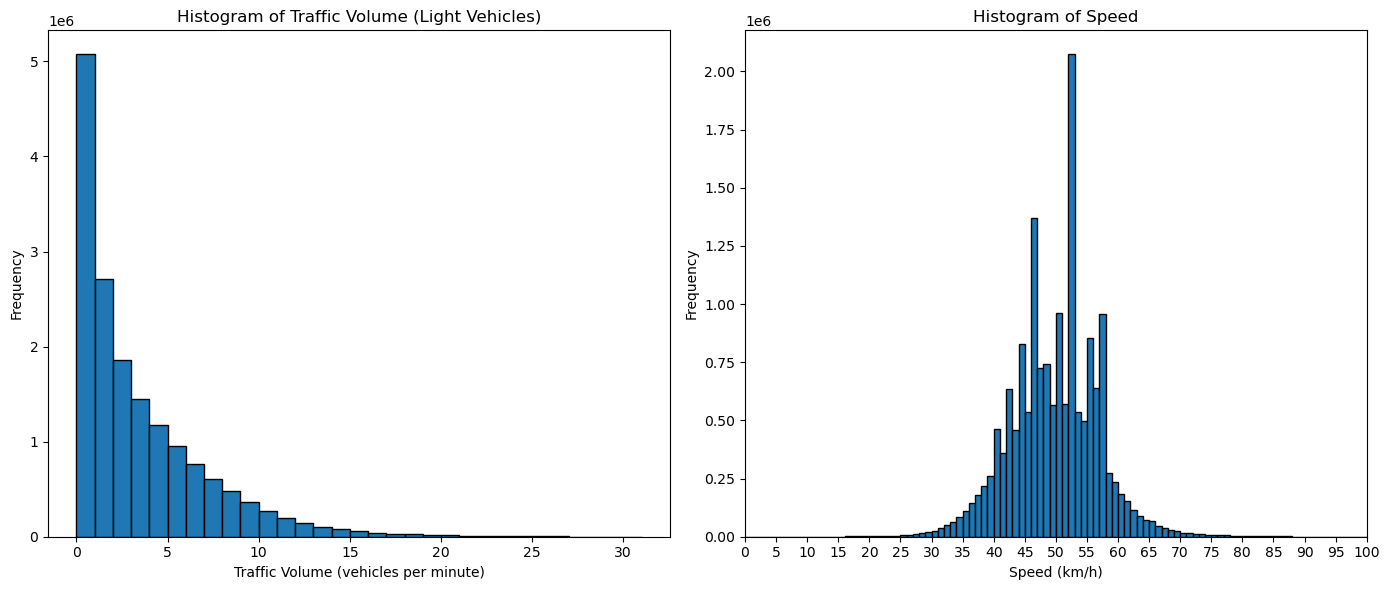

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('sample_vamos_data_2022_23.csv')

data['time'] = pd.to_datetime(data['time'])

traffic_volume_light = data['trafficVolumeLight']
speed = data['speed']

speed_filtered = speed[(speed != 0) & (~speed.isna()) & (speed <= 100)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


ax1.hist(traffic_volume_light, bins=range(0, 32), edgecolor='black', range=(0, 30))
ax1.set_xlabel('Traffic Volume (vehicles per minute)')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Traffic Volume (Light Vehicles)')
ax1.set_xticks(range(0, 31, 5))

ax2.hist(speed_filtered, bins=range(0, 101), edgecolor='black')
ax2.set_xlabel('Speed (km/h)')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Speed')
ax2.set_xticks(range(0, 101, 5))
ax2.set_xlim(0, 100)


plt.tight_layout()

plt.show()


## Traffic flow time series

Selected sensor IDs: [1288 1295  397  501]


C:\Users\Malay Gaherwar\AppData\Local\Temp\ipykernel_12112\4047868737.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data['minute_of_day'] = sensor_data['time'].dt.hour * 60 + sensor_data['time'].dt.minute
C:\Users\Malay Gaherwar\AppData\Local\Temp\ipykernel_12112\4047868737.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_data['hour_of_day'] = sensor_data['time'].dt.hour
C:\Users\Malay Gaherwar\AppData\Local\Temp\ipykernel_12112\4047868737.py:28: SettingWithCopyWarning: 
A value is 

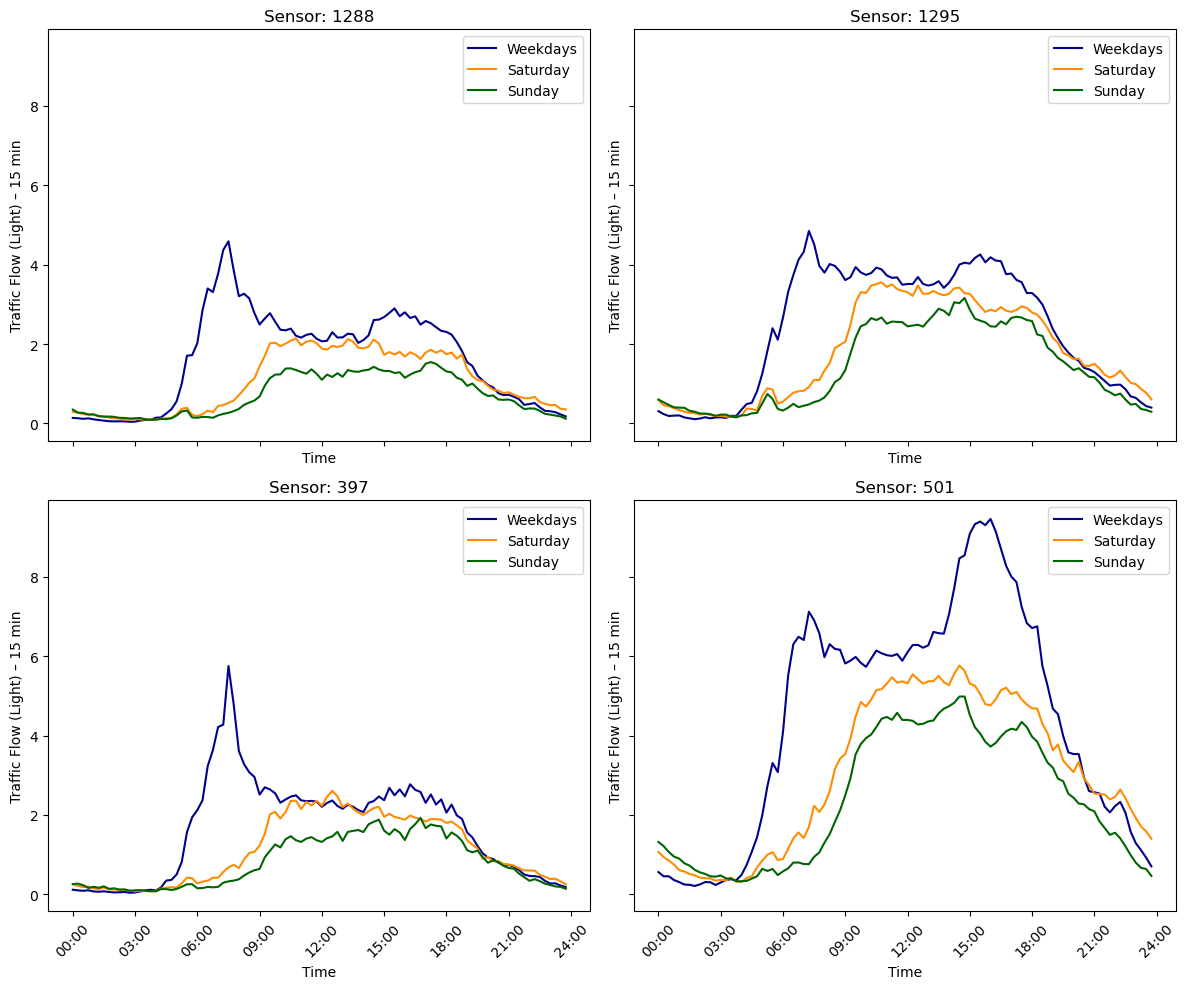

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('sample_vamos_data_2022_23.csv')

data['time'] = pd.to_datetime(data['time'])

selected_sensors = np.random.choice(data['s_idx'].unique(), 4, replace=False)
print(f"Selected sensor IDs: {selected_sensors}")


fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)


axes = axes.flatten()

for i, sensor in enumerate(selected_sensors):
    
    sensor_data = data[data['s_idx'] == sensor]

    sensor_data['minute_of_day'] = sensor_data['time'].dt.hour * 60 + sensor_data['time'].dt.minute
    sensor_data['hour_of_day'] = sensor_data['time'].dt.hour
    sensor_data['weekday'] = sensor_data['time'].dt.day_name()

    sensor_data['total_traffic_volume'] = sensor_data['trafficVolumeLight'] + sensor_data['trafficVolumeHeavy']

    sensor_data.set_index('time', inplace=True)

    # Resample the data to 15-minute intervals and calculate the mean traffic volume
    resampled_data = sensor_data['total_traffic_volume'].resample('15T').mean()

    weekdays_data = resampled_data[sensor_data['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
    saturday_data = resampled_data[sensor_data['weekday'] == 'Saturday']
    sunday_data = resampled_data[sensor_data['weekday'] == 'Sunday']

    # Resample the data into 15-minute intervals for the entire dataset
    weekday_avg = weekdays_data.groupby(weekdays_data.index.time).mean()
    saturday_avg = saturday_data.groupby(saturday_data.index.time).mean()
    sunday_avg = sunday_data.groupby(sunday_data.index.time).mean()

    # Ensure all 15-minute intervals are covered
    all_intervals = pd.date_range(start='00:00', end='23:45', freq='15T').time
    weekday_avg = weekday_avg.reindex(all_intervals, fill_value=0)
    saturday_avg = saturday_avg.reindex(all_intervals, fill_value=0)
    sunday_avg = sunday_avg.reindex(all_intervals, fill_value=0)

    # Plot lines for weekdays, Saturday, and Sunday without markers
    axes[i].plot([f"{t.hour:02d}:{t.minute:02d}" for t in all_intervals], weekday_avg.values, color='darkblue', linestyle='-', linewidth=1.5, label='Weekdays')
    axes[i].plot([f"{t.hour:02d}:{t.minute:02d}" for t in all_intervals], saturday_avg.values, color='darkorange', linestyle='-', linewidth=1.5, label='Saturday')
    axes[i].plot([f"{t.hour:02d}:{t.minute:02d}" for t in all_intervals], sunday_avg.values, color='darkgreen', linestyle='-', linewidth=1.5, label='Sunday')

    axes[i].set_title(f'Sensor: {sensor}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Traffic Flow (Light) – 15 min')

    # Format x-axis to show every 3 hours
    axes[i].xaxis.set_major_locator(plt.MultipleLocator(12))  # Major ticks every 3 hours (12 x 15 minutes)
    axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x // 4):02d}:00'))
    axes[i].tick_params(axis='x', rotation=45)

for ax in axes:
    ax.legend()

plt.tight_layout()


plt.savefig('traffic_flow_sensors.png', dpi=300)

plt.show()


## Looking at the PEMS03 data structure

In [2]:
import numpy as np
import pandas as pd

# Load the .npz file
npz_file = np.load('BasicTS/datasets/raw_data/PEMS03/PEMS03.npz')["data"]
print(npz_file.shape)
npz_file=npz_file[...,[0]]
print(type(npz_file))
print(npz_file.shape)
# Print the keys of the npz file to understand the structure
print("Keys in the npz file:", npz_file.keys())

# Extract the relevant array
data_key = 'data'  # Replace with the actual key
data_array = npz_file[data_key]

# Check the shape of the array
timesteps, locations, features = data_array.shape
print(f"Shape of the array: timesteps={timesteps}, locations={locations}, features={features}")

# Display the first 10 timesteps for each feature separately
features_names = ['flow', 'occupancy', 'speed']
dfs = {}

for i, feature in enumerate(features_names):
    feature_data = data_array[:, :, i]  # Extract data for the current feature
    df = pd.DataFrame(feature_data[:10])
    dfs[feature] = df
    print(f"\nFirst 10 timesteps for {feature}:")
    print(df)

# Combine the data into a single dictionary of DataFrames
combined_df = pd.concat(dfs, axis=1)
print("\nCombined DataFrame with first 10 timesteps for each feature:")
print(combined_df)


(26208, 358, 1)
<class 'numpy.ndarray'>
(26208, 358, 1)


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

## Displaying the VAMOS pkl file generated

In [21]:
import pickle
import pandas as pd
import numpy as np
import os
from prettytable import PrettyTable

def display_pkl_file(filepath):
    # Check if the file exists
    if not os.path.exists(filepath):
        print(f"File {filepath} does not exist.")
        return
    
    # Load the pickle file
    with open(filepath, 'rb') as file:
        data = pickle.load(file)
    
    # Check the type of data to display it accordingly
    if isinstance(data, np.ndarray):
        # If data is a NumPy array, convert it to DataFrame for better display
        df = pd.DataFrame(data)
        print("Displaying data as DataFrame:")
        display(df.head())
        print(df.to_string())
    elif isinstance(data, dict):
        # If data is a dictionary, use PrettyTable to display it
        table = PrettyTable()
        table.field_names = ["Key", "Value"]
        for key, value in data.items():
            table.add_row([key, value])
        print("Displaying data as dictionary:")
        print(table)
    elif isinstance(data, (list, tuple)):
        # If data is a list or tuple, use PrettyTable to display it
        table = PrettyTable()
        table.field_names = ["Index", "Value"]
        for idx, value in enumerate(data):
            table.add_row([idx, value])
        print(f"Displaying data as {'list' if isinstance(data, list) else 'tuple'}:")
        print(table)
    else:
        # For other data types, just print the data
        print("Displaying raw data:")
        print(data)

# Filepath to the pickle file
filepath = "BasicTS/datasets/raw_data/VAMOS/adj_VAMOS_distance.pkl"

# Display the content of the pickle file
display_pkl_file(filepath)


Displaying data as DataFrame:


,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.000000,3.161962,43.273972,41.876736,4920.771484,4919.951172,4888.549316,4888.452637,6512.898438,6515.321289,...,6681.543457,3236.379883,3238.102051,3247.124268,895.299377,3816.437988,3815.606201,3818.426025,11273.612305,11269.215820
1,3.161962,0.000000,42.197811,41.178547,4922.093750,4921.275391,4889.866211,4889.770996,6511.117676,6513.541992,...,6682.957520,3234.497803,3236.221680,3245.248779,892.182800,3814.002686,3813.128174,3815.947510,11270.453125,11266.056641
2,43.273972,42.197811,0.000000,5.384627,4963.993164,4963.171387,4931.775391,4931.677246,6470.642090,6473.060547,...,6724.674316,3194.536377,3196.250000,3205.252197,873.417236,3778.466553,3778.091553,3780.917236,11255.875000,11251.476562
3,41.876736,41.178547,5.384627,0.000000,4962.038574,4961.213379,4929.830566,4929.729980,6473.417480,6475.833496,...,6722.558594,3197.502441,3199.212646,3208.206543,878.709717,3782.427734,3782.130615,3784.957275,11261.234375,11256.834961
4,4920.771484,4922.093750,4963.993164,4962.038574,0.000000,3.605230,33.612442,33.012177,11394.479492,11397.125000,...,1770.466309,8115.439941,8117.454102,8127.133301,5476.669434,8522.252930,8500.467773,8502.920898,14208.793945,14204.864258


              0             1             2             3             4             5             6             7             8             9             10            11           12           13           14           15            16            17            18            19            20            21            22            23            24            25            26            27            28            29            30            31            32            33            34            35            36            37            38            39            40            41            42            43            44            45            46            47            48            49            50            51            52            53            54            55            56            57            58            59            60            61            62            63            64            65            66            67            68            69            70        

## Few cells below are just used for trying out dictionary in python

In [16]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},

          {'a': 100, 'b': 200, 'c': 300, 'd': 400},

          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000}]

df = pd.DataFrame(mydict)

df

,a,b,c,d
0,1,2,3,4
1,100,200,300,400
2,1000,2000,3000,4000


In [32]:
arr=np.zeros((5,2))
print(arr)
a1=(1,2)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [4]:
arr[:]=np.inf
print(arr)

NameError: name 'np' is not defined

In [48]:
import numpy as np
import pandas as pd
target_channel=[0]
data = np.load("raw_data/PEMS03/PEMS03.npz")["data"]
data = data[..., target_channel]
print("raw time series shape: {0}".format(data.shape))

history_seq_len = 12
future_seq_len = 12

train_ratio = 0.6
valid_ratio = 0.2
target_channel = [0]                  # target channel(s)
steps_per_day = 288

dataset_name = "pems03"
tod = True
dow=True
# split data
l, n, f = data.shape
num_samples = l - (history_seq_len + future_seq_len) + 1
print(num_samples)
train_num = round(num_samples * train_ratio)
valid_num = round(num_samples * valid_ratio)
test_num = num_samples - train_num - valid_num
print("number of training samples:{0}".format(train_num))
print("number of validation samples:{0}".format(valid_num))
print("number of test samples:{0}".format(test_num))



print("First value recorded by the first sensor at the first time step: data[0, 0, 0] =", data[2122, 22, :])
print("First value recorded by the first sensor at the second time step: data[1, 0, 0] =", data[1, 0, 0])
print("First value recorded by the second sensor at the first time step: data[0, 1, 0] =", data[0, 1, 0])

reshaped_data = data.reshape(26208, 358)

# Create a pandas DataFrame
df = pd.DataFrame(reshaped_data)

# Set the row and column indices
df.index = range(1, 26209)  # Row indices from 1 to 26208
df.columns = range(1, 359)  # Column indices from 1 to 358

# Show the first few rows of the DataFrame
display(df.head())


raw time series shape: (26208, 358, 1)
26185
number of training samples:15711
number of validation samples:5237
number of test samples:5237
First value recorded by the first sensor at the first time step: data[0, 0, 0] = [138.]
First value recorded by the first sensor at the second time step: data[1, 0, 0] = 22.0
First value recorded by the second sensor at the first time step: data[0, 1, 0] = 20.0


,1,2,3,4,5,6,7,8,9,10,...,349,350,351,352,353,354,355,356,357,358
1,20.0,20.0,182.0,182.0,91.0,182.0,136.0,91.0,91.0,136.0,...,158.0,63.0,63.0,63.0,125.0,114.0,63.0,63.0,115.0,63.0
2,22.0,22.0,174.0,174.0,87.0,174.0,131.0,87.0,87.0,131.0,...,158.0,62.0,62.0,62.0,144.0,109.0,62.0,63.0,109.0,62.0
3,22.0,22.0,183.0,183.0,92.0,183.0,139.0,92.0,92.0,139.0,...,160.0,57.0,57.0,57.0,131.0,116.0,57.0,57.0,115.0,57.0
4,50.0,49.0,137.0,139.0,60.0,158.0,111.0,57.0,55.0,99.0,...,174.0,109.0,30.0,58.0,106.0,102.0,52.0,111.0,88.0,48.0
5,37.0,35.0,128.0,123.0,54.0,131.0,111.0,46.0,52.0,78.0,...,162.0,77.0,31.0,55.0,109.0,127.0,49.0,109.0,76.0,47.0


## Displaying the data structure of METR-La dataset

In [47]:
import numpy as np
import pandas as pd
target_channel=[0]

df = pd.read_hdf("raw_data/METR-LA/METR-LA.h5")
display(df.head())
print("raw time series shape: {0}".format(data.shape))

history_seq_len = 12
future_seq_len = 12

train_ratio = 0.6
valid_ratio = 0.2
target_channel = [0]                  # target channel(s)
steps_per_day = 288


,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,62.750000,...,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,63.333333,...,50.666667,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000


raw time series shape: (26208, 358, 1)


## Analysing shape of the Sample VAMOS data

In [6]:
import pandas as pd
import numpy as np

# Load the CSV file into a pandas DataFrame
file_path = 'sample_vamos_data_2022_23.csv'
df = pd.read_csv(file_path, parse_dates=['time'])

# Pivot the DataFrame to get the required format
pivot_df = df.pivot(index='time', columns='s_idx', values='trafficVolumeLight')

# Replace NaN values with 0 (assuming missing values should be treated as 0)
pivot_df = pivot_df.fillna(0)

# Convert the pivoted DataFrame to a 3D numpy array
# Shape: (timesteps, sensors, 1)
traffic_volume_light_array = pivot_df.values[:, :, np.newaxis]

# Print the shape of the resulting array
print("Shape of the 3D numpy array:", traffic_volume_light_array.shape)

# Optionally, print the numpy array to verify
print(traffic_volume_light_array)


Shape of the 3D numpy array: (786240, 23, 1)
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [1.]
  [0.]]

 [[0.]
  [1.]
  [0.]
  ...
  [2.]
  [0.]
  [0.]]

 ...

 [[2.]
  [2.]
  [0.]
  ...
  [0.]
  [2.]
  [1.]]

 [[1.]
  [0.]
  [2.]
  ...
  [0.]
  [1.]
  [1.]]

 [[0.]
  [1.]
  [1.]
  ...
  [0.]
  [0.]
  [0.]]]


## reshaping the data into a 2D array to display it nicely

In [11]:

reshaped_data = traffic_volume_light_array.reshape(786240, 23)

# Create a pandas DataFrame
df = pd.DataFrame(reshaped_data)

# Set the row and column indices
df.index = range(1, 786241)  # Row indices from 1 to 26208
df.columns = range(1, 24)  # Column indices from 1 to 358

# Show the first few rows of the DataFrame
display(df)


,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786236,3.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,3.0,0.0,...,1.0,2.0,2.0,2.0,1.0,2.0,1.0,0.0,3.0,0.0
786237,2.0,0.0,2.0,0.0,8.0,2.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0
786238,2.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,6.0,1.0,...,4.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0
786239,1.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0,3.0,0.0,...,1.0,3.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0


## Plotting the number of data points for each of the 23 sensors

s_idx
493     786240
421     786240
182     786240
395     786240
396     786240
499     786240
397     786240
491     786240
502     786240
501     786240
1288    786240
422     786240
494     786240
184     786240
500     786240
185     786240
183     786240
420     786240
423     786240
492     786240
1294    786240
394     786240
1295    786240
Name: count, dtype: int64


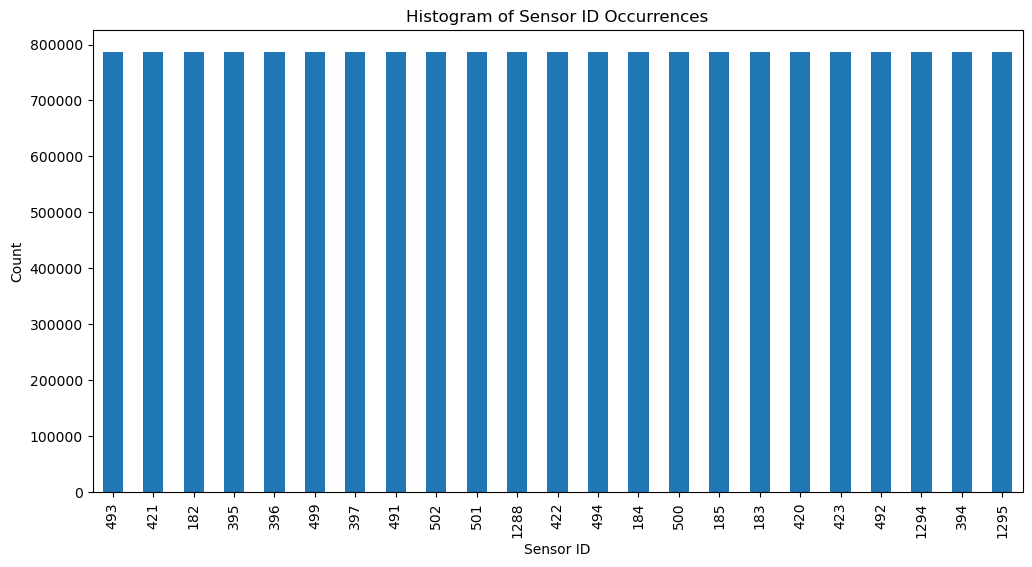

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'sample_vamos_data_2022_23.csv'
df = pd.read_csv(file_path)

sensor_counts = df['s_idx'].value_counts()


plt.figure(figsize=(12, 6))
sensor_counts.plot(kind='bar')
plt.xlabel('Sensor ID')
plt.ylabel('Count')
plt.title('Histogram of Sensor ID Occurrences')
plt.show()


In [5]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = 'sample_vamos_data_2022_23.csv'
df = pd.read_csv(file_path)

# Extract the unique sensor IDs in the order they first appear
sensor_indices_order = df['s_idx'].drop_duplicates().tolist()

# Load the pcs_meta.csv file into a pandas DataFrame
pcs_meta_file_path = 'pcs_meta.csv'
pcs_meta_df = pd.read_csv(pcs_meta_file_path)

# Filter the DataFrame to include only the specified sensor indices
filtered_df = pcs_meta_df[pcs_meta_df['s_idx'].isin(sensor_indices_order)]

# Sort the filtered DataFrame by the order of sensor indices in sensor_indices_order
filtered_df['order'] = pd.Categorical(filtered_df['s_idx'], categories=sensor_indices_order, ordered=True)
sorted_filtered_df = filtered_df.sort_values('order').drop('order', axis=1)


# If needed, display the sorted filtered DataFrame
import IPython.display as display
display.display(sorted_filtered_df)


C:\Users\Malay Gaherwar\AppData\Local\Temp\ipykernel_20120\3197162699.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['order'] = pd.Categorical(filtered_df['s_idx'], categories=sensor_indices_order, ordered=True)


,s_idx,pcs_id,lane,location,geom
44,493,507,3,Bergstr. i. H. Mommsenstr. Richtung Zentrum re...,POINT (13.73143603116009 51.027452949844644)
45,494,507,4,Bergstr. i. H. Mommsenstr. Richtung Zentrum links,POINT (13.731379274848074 51.02744334473166)
32,394,404,1,Teplitzer Str. i. H. Reichenbachstr. Richtung ...,POINT (13.751151236397671 51.0305957001608)
142,1294,0402W,6,Wiener Str. i. H. Richard-Strauss-Platz Ri. Ha...,POINT (13.74905658804675 51.0358589871864)
43,492,507,2,Bergstr. i. H. Mommsenstr. Richtung BAB AS DD-...,POINT (13.73143502196513 51.02696751819553)
41,423,124,4,Wiener Str. i. H. Uhlandtstr. Richtung Zentrum...,POINT (13.740396385090639 51.03871448650421)
38,420,124,1,Wiener Str. i. H. Uhlandtstr. Richtung Strehle...,POINT (13.740616281645 51.03849212396226)
3,183,552,2,Zellescher Weg i. H. Ackermannstr. Richtung St...,POINT (13.747682970010683 51.028104535773885)
5,185,552,4,Zellescher Weg i. H. Ackermannstr. Richtung Sü...,POINT (13.747165102455956 51.028278772826965)
51,500,506,4,Nürnberger Str. i. H. Fritz-Foerster-Pl. Richt...,POINT (13.728742695314256 51.03107333917426)


In [3]:
file_path = 'sample_vamos_data_2022_23.csv'
df = pd.read_csv(file_path)
df['Datetime'] = pd.to_datetime(df['time'], format='%d-%m-%Y %H:%M')
df.set_index('Datetime', inplace=True)

data = df[['trafficVolumeLight']].values
print("raw time series shape: {0}".format(data.shape))


ValueError: time data "2022-01-01 00:00:00" doesn't match format "%d-%m-%Y %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.